# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information



Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Importing Modules And Dataset

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
df=pd.read_csv('/content/drive/MyDrive/BIA/Project_1/Heart Disease/heart.csv')

#EDA & Preprocessing

In [195]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [196]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [197]:
df.shape

(918, 12)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


1. The output shows that the DataFrame contains 918 entries and 12 columns.

2. Each column's non-null count indicates that there are no missing values in any column.

3. The dtypes row shows the data types of the columns, including int64 (integer) and object (categorical/string data)

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [200]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [201]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [202]:
df.duplicated().sum()

0

In [203]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [204]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [205]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


Visualizing the integer data types of features.

<Axes: title={'center': 'Age'}, ylabel='Age'>

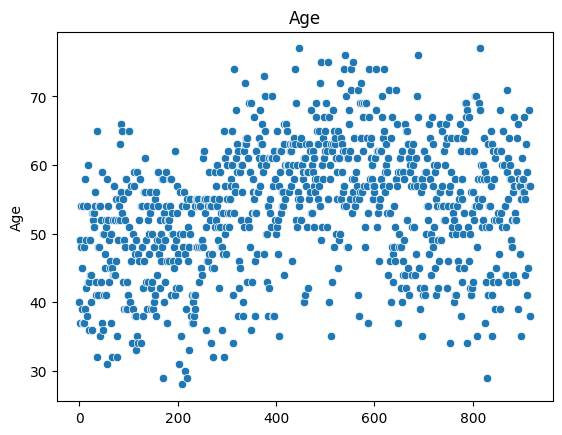

In [206]:
plt.title('Age')
sns.scatterplot(df['Age'])

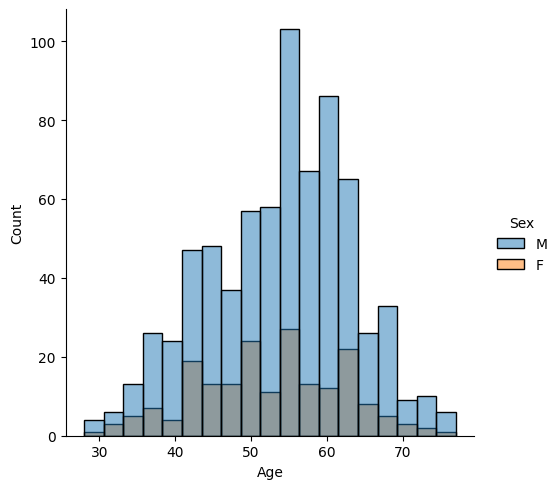

In [207]:

sns.displot(x=df['Age'],hue=df['Sex'])

<ipython-input-208-b93a8a34185f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Age'])


<Axes: ylabel='Density'>

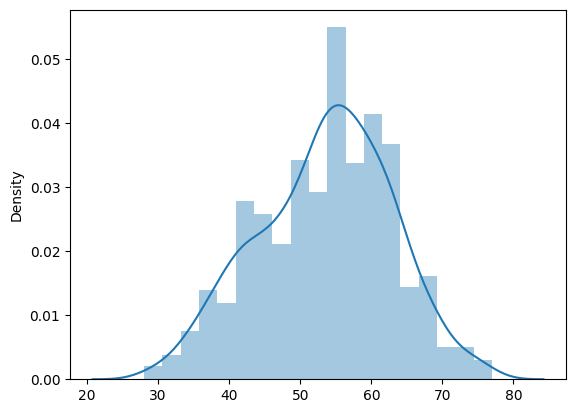

In [208]:
sns.distplot(x=df['Age'])

<Axes: xlabel='Age'>

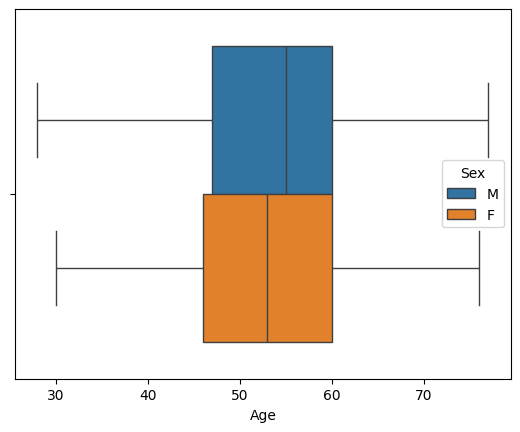

In [209]:
sns.boxplot(x=df['Age'],hue=df['Sex'])

<Axes: ylabel='RestingBP'>

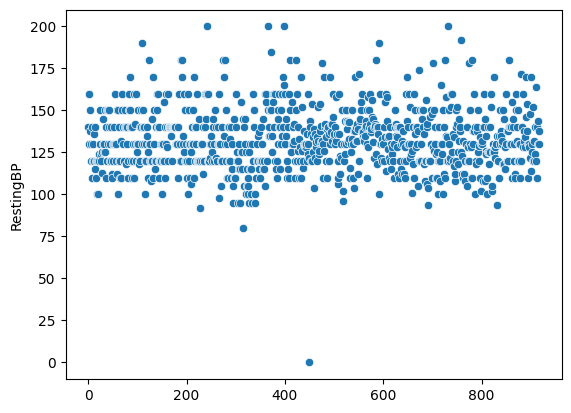

In [210]:
sns.scatterplot(df['RestingBP'])

<Axes: xlabel='RestingBP'>

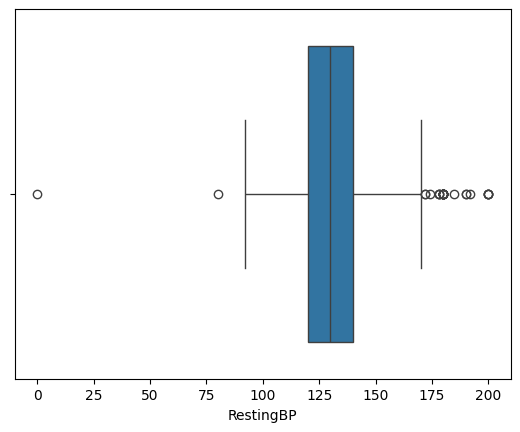

In [211]:
sns.boxplot(x=df['RestingBP'])

Points outside the line indicate values considered outliers.

In [212]:
df[df['RestingBP']<100]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
267,34,M,ATA,98,220,0,Normal,150,N,0.0,Up,0
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
304,51,M,ASY,95,0,1,Normal,126,N,2.2,Flat,1
309,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
328,52,M,ASY,95,0,1,Normal,82,Y,0.8,Flat,1
333,40,M,ASY,95,0,1,ST,144,N,0.0,Up,1
339,64,F,ASY,95,0,1,Normal,145,N,1.1,Down,1
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


<ipython-input-213-01d18230f8ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['RestingBP'])


<Axes: ylabel='Density'>

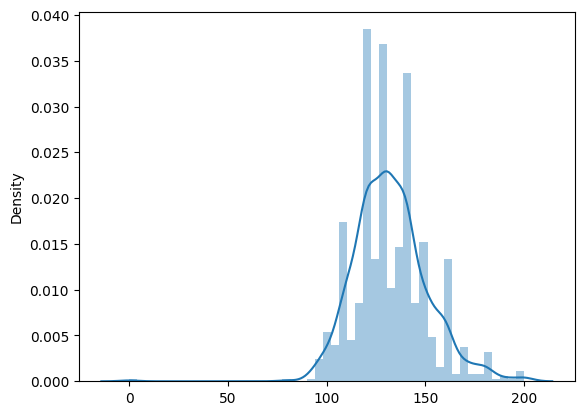

In [213]:
sns.distplot(x=df['RestingBP'])

<Axes: xlabel='Cholesterol'>

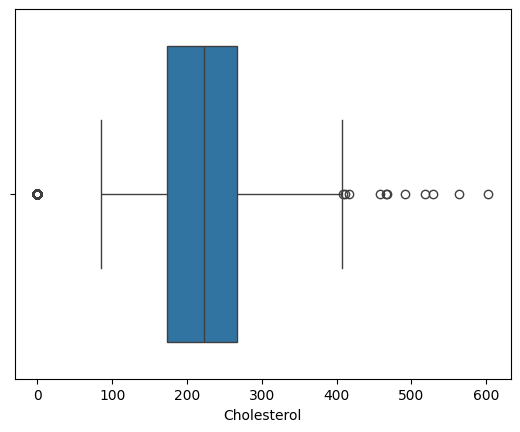

In [214]:
sns.boxplot(x=df['Cholesterol'])

<ipython-input-215-37bc93ba9a78>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Cholesterol'])


<Axes: ylabel='Density'>

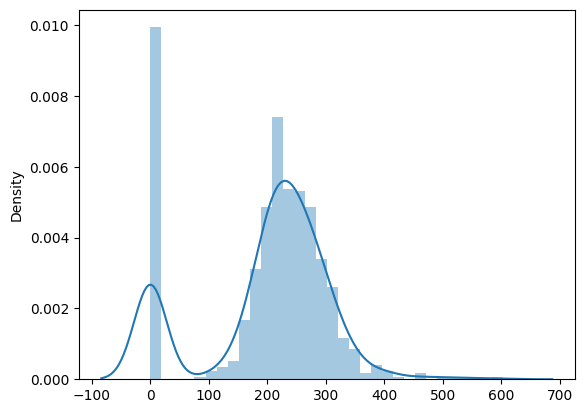

In [215]:
sns.distplot(x=df['Cholesterol'])

<Axes: xlabel='FastingBS'>

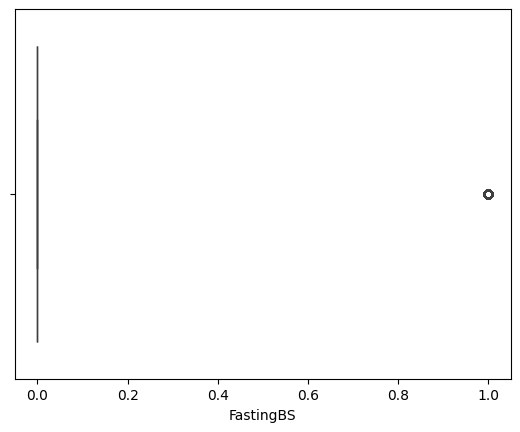

In [216]:
sns.boxplot(x=df['FastingBS'])

<ipython-input-217-fae2932b1d8b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['FastingBS'])


<Axes: ylabel='Density'>

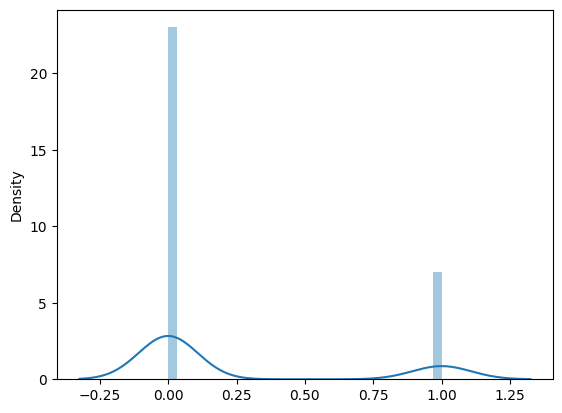

In [217]:
sns.distplot(x=df['FastingBS'])

<Axes: xlabel='MaxHR'>

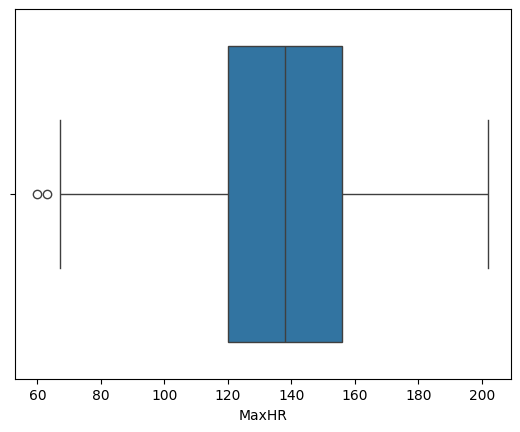

In [218]:
sns.boxplot(x=df['MaxHR'])

<ipython-input-219-4b80ed4665a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['MaxHR'])


<Axes: ylabel='Density'>

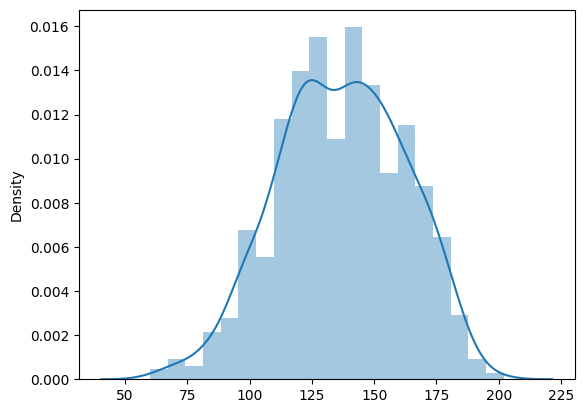

In [219]:
sns.distplot(x=df['MaxHR'])

<Axes: xlabel='Oldpeak'>

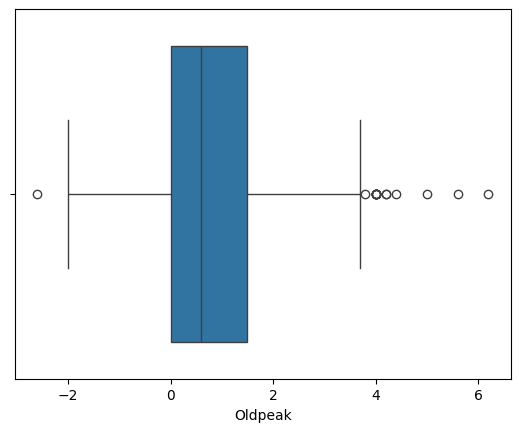

In [220]:
sns.boxplot(x=df['Oldpeak'])

<ipython-input-221-0225e334c034>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Oldpeak'])


<Axes: ylabel='Density'>

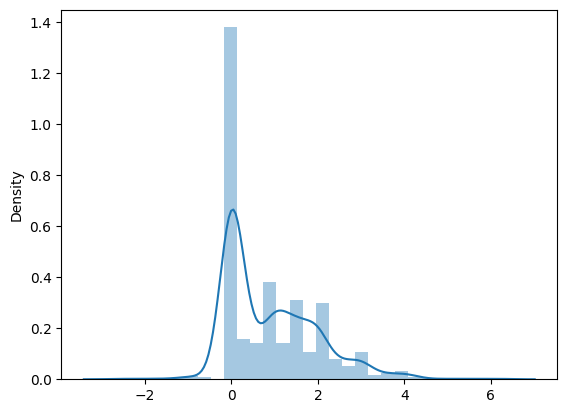

In [221]:
sns.distplot(x=df['Oldpeak'])

Visualizing string data types features.

<Axes: xlabel='Sex', ylabel='count'>

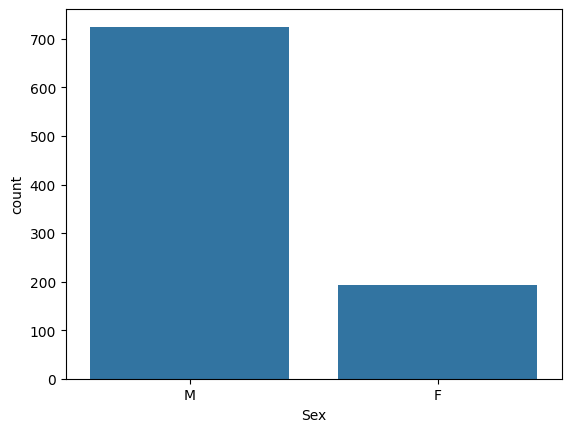

In [222]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

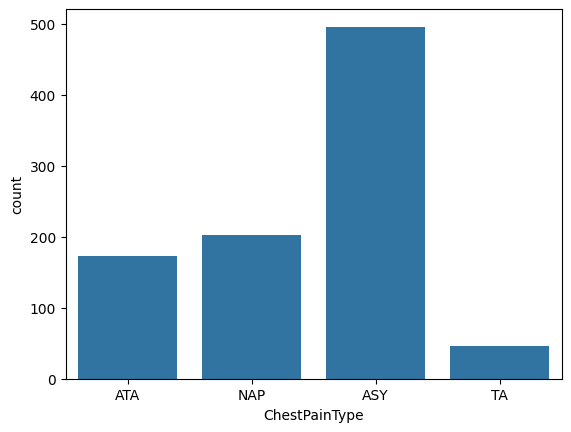

In [223]:
sns.countplot(x=df['ChestPainType'])

<Axes: xlabel='RestingECG', ylabel='count'>

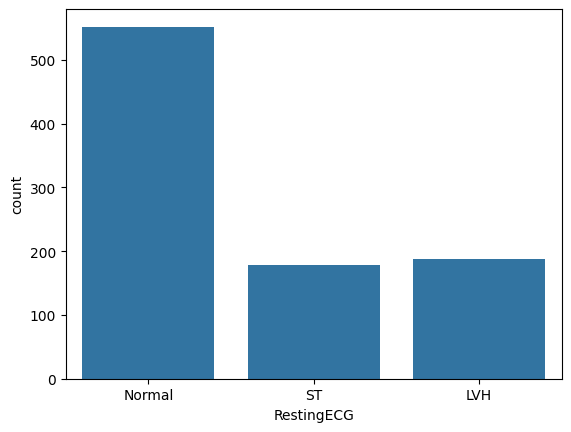

In [224]:
sns.countplot(x=df['RestingECG'])

<Axes: xlabel='ExerciseAngina', ylabel='count'>

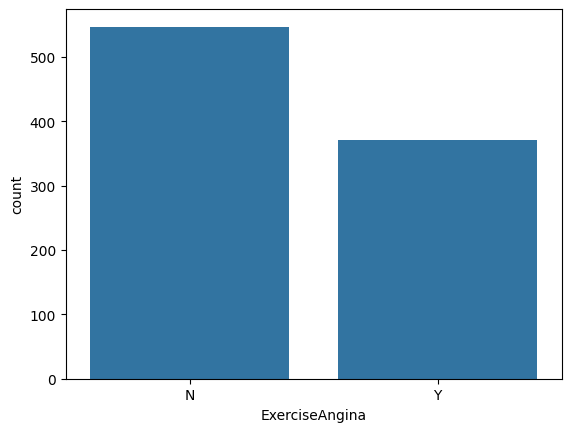

In [225]:
sns.countplot(x=df['ExerciseAngina'])

<Axes: xlabel='ST_Slope', ylabel='count'>

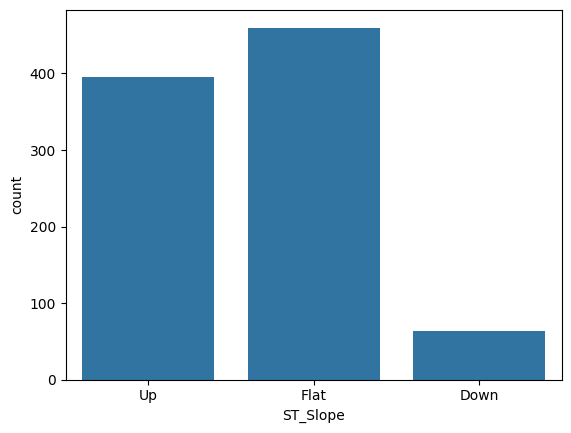

In [226]:
sns.countplot(x=df['ST_Slope'])

<Axes: xlabel='HeartDisease', ylabel='count'>

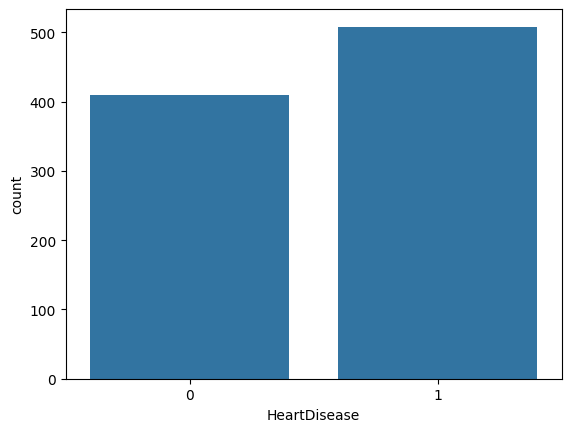

In [227]:
sns.countplot(x=df['HeartDisease'])

In [228]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


Labeling the Categorical(nominal/ordinal) Feactures.

In [229]:
for i in df.columns:
    if df[i].dtype == 'object': # Check if data type is 'object'
        print(i)  # Print the column name

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [230]:
df['Sex']

,Sex
0,M
1,F
2,M
3,F
4,M
...,...
913,M
914,M
915,M
916,F


In [231]:
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

In [232]:
df['Sex']

,Sex
0,0
1,1
2,0
3,1
4,0
...,...
913,0
914,0
915,0
916,1


In [233]:
df['ChestPainType']

,ChestPainType
0,ATA
1,NAP
2,ATA
3,ASY
4,NAP
...,...
913,TA
914,ASY
915,ASY
916,ATA


In [234]:
df['ChestPainType']=df['ChestPainType'].map({'TA':0,'ATA':1,'NAP':2,'ASY':3})

In [235]:
df['ChestPainType']

,ChestPainType
0,1
1,2
2,1
3,3
4,2
...,...
913,0
914,3
915,3
916,1


In [236]:
df['RestingECG']

,RestingECG
0,Normal
1,Normal
2,ST
3,Normal
4,Normal
...,...
913,Normal
914,Normal
915,Normal
916,LVH


In [237]:
df['RestingECG']=df['RestingECG'].map({'Normal':0,'ST':1,'LVH':2})

In [238]:
df['RestingECG']

,RestingECG
0,0
1,0
2,1
3,0
4,0
...,...
913,0
914,0
915,0
916,2


In [239]:
df['ExerciseAngina']

,ExerciseAngina
0,N
1,N
2,N
3,Y
4,N
...,...
913,N
914,N
915,Y
916,N


In [240]:
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0,'Y':1})

In [241]:
df['ExerciseAngina']

,ExerciseAngina
0,0
1,0
2,0
3,1
4,0
...,...
913,0
914,0
915,1
916,0


In [242]:
df['ST_Slope']

,ST_Slope
0,Up
1,Flat
2,Up
3,Flat
4,Up
...,...
913,Flat
914,Flat
915,Flat
916,Flat


In [243]:
df['ST_Slope']=df['ST_Slope'].map({'Up':0,'Flat':1,'Down':3})

In [244]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [245]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.251363,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.137437,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.273335,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.055423,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.112759,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.169334,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.079651,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.288409,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.374468,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.490606,0.403951


<Axes: >

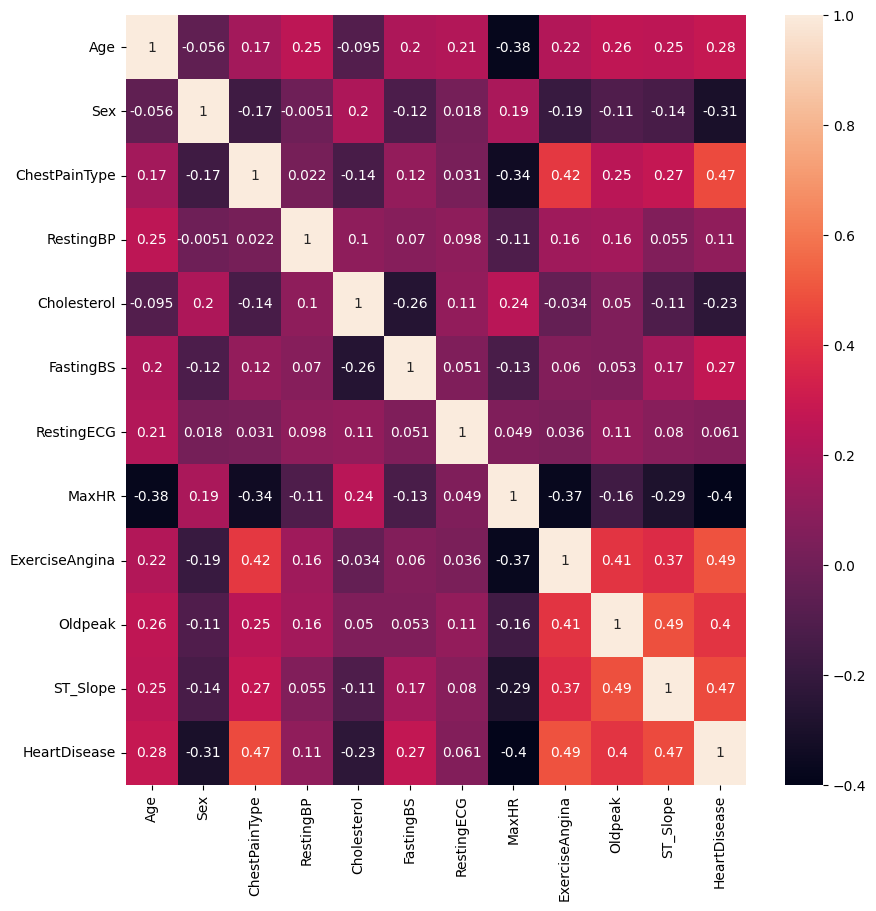

In [246]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Separating the data into X for independent features and y for dependent features.

In [247]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [248]:
X.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [249]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,0,172,0,0.0,0
1,49,1,2,160,180,0,0,156,0,1.0,1
2,37,0,1,130,283,0,1,98,0,0.0,0
3,48,1,3,138,214,0,0,108,1,1.5,1
4,54,0,2,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1
914,68,0,3,144,193,1,0,141,0,3.4,1
915,57,0,3,130,131,0,0,115,1,1.2,1
916,57,1,1,130,236,0,2,174,0,0.0,1


In [250]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


Splitting the data into a train-test split.

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=123, stratify=y)

In [253]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,0,172,0,0.0,0
462,59,0,3,122,233,0,0,117,1,1.3,3
853,47,0,2,138,257,0,2,156,0,0.0,0
540,62,0,2,138,204,0,1,122,1,1.2,1
162,47,0,1,160,263,0,0,174,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
367,68,0,3,135,0,0,1,120,1,0.0,0
177,59,0,1,140,287,0,0,150,0,0.0,0
192,48,0,1,130,245,0,0,160,0,0.0,0
239,48,0,3,160,193,0,0,102,1,3.0,1


In [254]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
633,64,0,0,110,211,0,2,144,1,1.8,1
884,67,0,3,160,286,0,2,108,1,1.5,1
60,49,0,1,100,253,0,0,174,0,0.0,0
219,29,0,1,140,263,0,0,170,0,0.0,0
143,53,0,3,140,243,0,0,155,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
132,56,0,3,170,388,0,1,122,1,2.0,1
486,55,0,1,110,214,1,1,180,0,0.4,0
859,51,1,2,140,308,0,2,142,0,1.5,0
334,51,0,3,130,0,1,0,170,0,-0.7,0


In [255]:
y_train

,HeartDisease
0,0
462,1
853,0
540,1
162,0
...,...
367,1
177,0
192,0
239,1


In [256]:
y_test

,HeartDisease
633,0
884,1
60,0
219,0
143,0
...,...
132,1
486,0
859,0
334,1


In [257]:
from sklearn.preprocessing import StandardScaler

In [258]:
scaler = StandardScaler()


In [259]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

1. This dataset contains a target feature, making it suitable for supervised machine learning.
2. The target feature has two values, making it a binary classification problem. For this, I am using logistic regression.
3. The target features have values 1 and 0, with counts of 508 and 410, respectively. This indicates data imbalance; therefore, I want to use a random forest.
4.  SVM focuses on maximizing the margin between classes, reducing overfitting, and improving generalization to unseen data.

# Model Creation for Logistic Regression

Model Creation for Logistic Regression

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
logi=LogisticRegression(random_state=123)

In [262]:
logi.fit(X_train,y_train)

LogisticRegression(random_state=123)

for loading the model

In [263]:
import joblib

In [264]:
joblib.dump(logi,'logistic_regression.pkl')

['logistic_regression.pkl']

In [265]:
log_reg_model = joblib.load("logistic_regression.pkl")

Predictions:

In [266]:
y_pred_logi=logi.predict(X_test)

In [267]:
y_pred_logi

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [268]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_logi})

In [269]:
result

,Actual,Predicted
633,0,1
884,1,1
60,0,0
219,0,0
143,0,0
...,...,...
132,1,1
486,0,0
859,0,0
334,1,1


Model Evaluation

In [270]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [271]:
print(f'{confusion_matrix(y_test,y_pred_logi)}')

[[105  18]
 [ 27 126]]


In [272]:
print(f'Accuracy Score is : {accuracy_score(y_test,y_pred_logi)*100:.2f}')

Accuracy Score is : 83.70


In [273]:
print(f'Precision Score is : {precision_score(y_test,y_pred_logi)*100:.2f}')

Precision Score is : 87.50


In [274]:
print(f'Recall Score is : {recall_score(y_test,y_pred_logi)*100:.2f}')

Recall Score is : 82.35


In [275]:
print(f'F1 Score is : {f1_score(y_test,y_pred_logi)*100:.2f}')

F1 Score is : 84.85


In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       123
           1       0.87      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



Conclusion:

The heart disease prediction model, evaluated using Logistic Regression, achieved an accuracy of 83.70%, indicating that the model correctly predicts heart disease cases most of the time.

Precision (87.50%) suggests that when the model predicts a positive case (heart disease present), it is correct 87.5% of the time.
Recall (82.35%) indicates that the model correctly identifies 82.35% of actual heart disease cases.
F1-score (84.85%) balances precision and recall, showing the model's effectiveness in handling both false positives and false negatives.
The confusion matrix highlights some misclassifications, with 18 false positives and 27 false negatives. Further improvements, such as hyperparameter tuning, feature selection, and advanced ensemble methods, could enhance the model's performance. Additionally, handling class imbalance with techniques like oversampling may improve recall for detecting heart disease cases.

# Model Creation For SVM

In [277]:
from sklearn.svm import SVC

In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
svm=SVC(random_state=123)

In [280]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [281]:
grid_svc=GridSearchCV(SVC(random_state=123),param_grid,cv=5)

In [282]:
best_model1=grid_svc.fit(X_train,y_train)

In [283]:
best_model1.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [284]:
grid_svc.best_estimator_.fit(X_train, y_train)

SVC(C=1, random_state=123)

In [285]:
import joblib

In [286]:
joblib.dump(svm,'svm.pkl')

['svm.pkl']

In [287]:
svm_model = joblib.load("svm.pkl")

Prediction:

In [288]:
y_pred_svc=grid_svc.predict(X_test)

In [289]:
y_pred_svc

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [290]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_svc})

In [291]:
result

,Actual,Predicted
633,0,1
884,1,1
60,0,0
219,0,0
143,0,0
...,...,...
132,1,1
486,0,0
859,0,0
334,1,1


Model Evaluation:

In [292]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [295]:
print(f'{confusion_matrix(y_test,y_pred_svc)}')

[[102  21]
 [ 12 141]]


In [296]:
print(f'Accuracy Score is : {accuracy_score(y_test,y_pred_svc)*100:.2f}')

Accuracy Score is : 88.04


In [297]:
print(f'Precision Score is : {precision_score(y_test,y_pred_svc)*100:.2f}')

Precision Score is : 87.04


In [298]:
print(f'Recall Score is : {recall_score(y_test,y_pred_svc)*100:.2f}')

Recall Score is : 92.16


In [299]:
print(f'f1 Score is : {f1_score(y_test,y_pred_svc)*100:.2f}')

f1 Score is : 89.52


In [324]:
print(f'{classification_report(y_test,y_pred_svc)}')

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       123
           1       0.87      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



The Support Vector Machine (SVM) model with GridSearch optimization for heart disease prediction achieved an accuracy of 88.04%, demonstrating improved performance compared to Logistic Regression.

Precision (87.04%) indicates that when the model predicts heart disease, it is correct 87.04% of the time.
Recall (92.16%) is significantly higher, meaning the model correctly identifies 92.16% of actual heart disease cases.
F1-score (89.52%) shows a strong balance between precision and recall, making this model more reliable for prediction.
The confusion matrix shows 12 false negatives and 21 false positives, suggesting that while the model is good at detecting heart disease cases, there are still some misclassifications.

The higher recall makes this model especially useful in medical applications where missing a heart disease case (false negative) could have severe consequences. Further enhancements, such as feature selection, advanced kernel tuning, or ensemble techniques, could further improve the model's performance.

# Model Creation for Random Forest

In [327]:
from sklearn.ensemble import RandomForestClassifier

In [328]:
rf=RandomForestClassifier(random_state=123)

In [329]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [330]:
import joblib

In [331]:
joblib.dump(rf,'random_forest.pkl')

['random_forest.pkl']

In [332]:
random_forest_model = joblib.load("random_forest.pkl")

prediction:

In [333]:
y_pred_rf = rf.predict(X_test)

In [334]:
y_pred_rf

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [335]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf})

In [336]:
result

,Actual,Predicted
633,0,1
884,1,1
60,0,0
219,0,0
143,0,0
...,...,...
132,1,1
486,0,0
859,0,0
334,1,1


Model Evaluation:

In [337]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [338]:
print(f'{confusion_matrix(y_test,y_pred_rf)}')

[[100  23]
 [ 16 137]]


In [339]:
print(f'Accuracy Score is : {accuracy_score(y_test,y_pred_rf)*100:.2f}')

Accuracy Score is : 85.87


In [340]:
print(f'Precision Score is : {precision_score(y_test,y_pred_rf)*100:.2f}')

Precision Score is : 85.62


In [341]:
print(f'Recall Score is : {recall_score(y_test,y_pred_rf)*100:.2f}')

Recall Score is : 89.54


In [342]:
print(f'F1 Score is : {f1_score(y_test,y_pred_rf)*100:.2f}')

F1 Score is : 87.54


In [343]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       123
           1       0.86      0.90      0.88       153

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



Conclusion:

The model does a good job overall. It is better at finding Class 1 cases (higher recall) but is more accurate in predicting Class 0 (higher precision). This means it correctly identifies most Class 0 cases but may miss some true Class 1 cases.

The Random Forest (RF) model for heart disease prediction achieved an accuracy of 85.87%, performing slightly lower than the SVM model but still demonstrating strong predictive capabilities.

Precision (85.62%) indicates that when the model predicts heart disease, it is correct 85.62% of the time.
Recall (89.54%) is high, meaning the model successfully detects 89.54% of actual heart disease cases.
F1-score (87.54%) shows a good balance between precision and recall, making this model reliable for classification.
The confusion matrix shows 16 false negatives and 23 false positives, indicating that while the model performs well, there is still room for improvement.

The high recall score suggests that the model effectively identifies heart disease cases, which is crucial in medical applications. However, to further enhance performance, techniques such as hyperparameter tuning, feature importance analysis, and ensemble methods (e.g., boosting) could be explored.

# Conclusion

The SVM model with GridSearch tuning provides the best accuracy (88.04%) and highest recall (92.16%), making it the most reliable choice for detecting heart disease.

If you prioritize precision (minimizing false positives), then Logistic Regression (87.50%) is slightly better. However, for an optimal balance of all metrics, SVM is the best-performing model.

#Deployment with Gradio

In [344]:
! pip install gradio

In [345]:
import gradio as gr

In [346]:
def predict_heart_disease(age, sex, chest_pain_type, resting_bp, cholesterol,
                          fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope,model_choice):
    features = [age, sex, chest_pain_type, resting_bp, cholesterol,
              fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]

    # Convert categorical inputs into numeric
    sex = 1 if sex == "Male" else 0

    chest_pain_mapping = {"Typical Angina": 1, "Atypical Angina": 2, "Non-Anginal Pain": 3, "Asymptomatic": 4}
    chest_pain_type = chest_pain_mapping[chest_pain_type]

    fasting_bs = 1 if ">" in fasting_bs else 0

    resting_ecg_mapping = {"Normal": 0, "ST-T Wave Abnormality": 1, "Left Ventricular Hypertrophy": 2}
    resting_ecg = resting_ecg_mapping[resting_ecg]

    exercise_angina = 1 if exercise_angina == "Yes" else 0

    st_slope_mapping = {"Upsloping": 1, "Flat": 2, "Downsloping": 3}
    st_slope = st_slope_mapping[st_slope]

    # Prepare the input data
    features = [age, sex, chest_pain_type, resting_bp, cholesterol,
              fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]

    # Choose the model
    if model_choice == "Logistic Regression":
        prediction = logi.predict([features])[0]
        probability = logi.predict_proba([features])[0][1]
    elif model_choice == "Random Forest":
        prediction = rf.predict([features])[0]
        probability = rf.predict_proba([features])[0][1]
    else:
        prediction = svm.predict([features])[0]
        probability = svm.decision_function([features])[0]

    result = "Heart Disease Detected" if prediction == 1 else "No Heart Disease"
    return result, f"Confidence: {probability * 100:.2f}%"

In [347]:
# Define input and output components using Blocks API
with gr.Blocks() as demo:
    gr.Markdown("Heart Disease Prediction")
    with gr.Row():
        with gr.Column():
            age = gr.Number(label="Age")
            sex = gr.Radio(["Male", "Female"], label="Sex", value="Male")  # Provide initial values for Radio to avoid errors
            chest_pain_type = gr.Radio(["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"], label="Chest Pain Type", value="Typical Angina")
            resting_bp = gr.Number(label="Resting Blood Pressure")
            cholesterol = gr.Number(label="Cholesterol")
            fasting_bs = gr.Radio(["Fasting Blood Sugar > 120 mg/dl", "Fasting Blood Sugar <= 120 mg/dl"], label="Fasting Blood Sugar", value="Fasting Blood Sugar <= 120 mg/dl")
            resting_ecg = gr.Radio(["Normal", "ST-T Wave Abnormality", "Left Ventricular Hypertrophy"], label="Resting Electrocardiogram", value="Normal")
            max_hr = gr.Number(label="Maximum Heart Rate")
            exercise_angina = gr.Radio(["Yes", "No"], label="Exercise Angina", value="No") # Corrected this component to gr.Radio
            oldpeak = gr.Number(label="Oldpeak")
            st_slope = gr.Radio(["Upsloping", "Flat", "Downsloping"], label="ST Slope", value="Upsloping")
            model_choice = gr.Radio(["Logistic Regression", "Random Forest", "SVM"], label="Model Choice", value="Logistic Regression")
            predict_btn = gr.Button("Predict")

In [348]:
demo = gr.Interface(
        fn=predict_heart_disease,
        inputs=[age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope, model_choice],
        outputs=[gr.Textbox(label="Prediction"), gr.Textbox(label="Confidence")],  # Define output types
        title="Heart Disease Prediction App",
        description=" Enter patient data to predict heart disease and Select a model.",
    )

In [349]:
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4ae2b6491ec5339817.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
